#SQL

In [102]:
import sqlite3
import pandas as pd
import numpy as np

In [103]:
con = sqlite3.connect("/content/drive/MyDrive/Colab Notebooks/database.sqlite")
cur = con.cursor()

In [104]:
# 1.SQLite implementation to Retrieve the top 8 rows from the table

for row in cur.execute('SELECT * FROM Salaries LIMIT 8;'):
    print(row)

(1, 'NATHANIEL FORD', 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY', 167411.18, 0, 400184.25, '', 567595.43, 567595.43, 2011, '', 'San Francisco', '')
(2, 'GARY JIMENEZ', 'CAPTAIN III (POLICE DEPARTMENT)', 155966.02, 245131.88, 137811.38, '', 538909.28, 538909.28, 2011, '', 'San Francisco', '')
(3, 'ALBERT PARDINI', 'CAPTAIN III (POLICE DEPARTMENT)', 212739.13, 106088.18, 16452.6, '', 335279.91, 335279.91, 2011, '', 'San Francisco', '')
(4, 'CHRISTOPHER CHONG', 'WIRE ROPE CABLE MAINTENANCE MECHANIC', 77916, 56120.71, 198306.9, '', 332343.61, 332343.61, 2011, '', 'San Francisco', '')
(5, 'PATRICK GARDNER', 'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)', 134401.6, 9737, 182234.59, '', 326373.19, 326373.19, 2011, '', 'San Francisco', '')
(6, 'DAVID SULLIVAN', 'ASSISTANT DEPUTY CHIEF II', 118602, 8601, 189082.74, '', 316285.74, 316285.74, 2011, '', 'San Francisco', '')
(7, 'ALSON LEE', 'BATTALION CHIEF, (FIRE DEPARTMENT)', 92492.01, 89062.9, 134426.14, '', 315981.05, 315981.05, 2011, ''

In [105]:
# 1.pandas implementation to Retrieve the top 8 rows from the table

df = pd.read_sql_query("""SELECT * FROM Salaries""", con)
df.head(8)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,


In [106]:
# 2.SQLite implementation What is the average TotalPay
output = pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries""", con)
output


,AVG(TotalPay)
0,74768.321972


In [107]:
# 2.pandas implementation What is the average TotalPay
df['TotalPay'].mean()

74768.321971703

In [108]:
# 3.SQLite implementation for highest amount of BasePay in the dataset
output = pd.read_sql_query("""SELECT MAX(BasePay) FROM Salaries WHERE BasePay !='Not Provided' AND BasePay != ''""", con)
output


,MAX(BasePay)
0,319275.01


In [109]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes                object
Agency               object
Status               object
dtype: object

In [110]:
df['BasePay'].unique()

array([167411.18, 155966.02, 212739.13, ..., 6.04, 15.5, 'Not Provided'],
      dtype=object)

In [111]:
df['BasePay'] = df['BasePay'].replace('Not Provided',np.NAN)

In [112]:
df['BasePay'].unique()

array([167411.18, 155966.02, 212739.13, ..., 6.04, 15.5, nan],
      dtype=object)

In [113]:
df['BasePay'] = pd.to_numeric(df['BasePay'])

In [114]:
# 3.pandas implementation  for highest amount of BasePay in the dataset
max(df.BasePay)

319275.01

In [115]:
# 4.SQLite implementation Job title of 'NATHANIEL FORD'?
output = pd.read_sql_query('''SELECT JobTitle FROM Salaries WHERE EmployeeName='NATHANIEL FORD' ''',con)
output



,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


In [116]:
# 4.pandas implementation Job title of 'NATHANIEL FORD'
df['JobTitle'][df['EmployeeName']=='NATHANIEL FORD']


0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Name: JobTitle, dtype: object

In [117]:
# 5.SQLite implementation 'TotalPayBenefits' is made by 'NATHANIEL FORD'
output = pd.read_sql_query("""SELECT TotalPayBenefits FROM Salaries WHERE EmployeeName='NATHANIEL FORD' """, con)
output


,TotalPayBenefits
0,567595.43


In [118]:
# 5.pandas implementation 'TotalPayBenefits' is made by 'NATHANIEL FORD'
df['TotalPayBenefits'][df['EmployeeName']=='NATHANIEL FORD']


0    567595.43
Name: TotalPayBenefits, dtype: float64

In [119]:
# 6.SQLite implementation average (mean) TotalPay of all employees per year
output = pd.read_sql_query("""SELECT AVG(TotalPay), Year FROM Salaries GROUP BY Year""", con)
output


,AVG(TotalPay),Year
0,71744.103871,2011
1,74113.262265,2012
2,77611.443142,2013
3,75463.918140,2014


In [120]:
# 6.pandas implementation average (mean) TotalPay of all employees per year
df.groupby('Year')["TotalPay"].mean()

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

In [121]:
# 7.SQLite implementation for how many unique jobs are there
output = pd.read_sql_query("""SELECT  COUNT(DISTINCT[JobTitle]) FROM Salaries""", con)
output



,COUNT(DISTINCT
0,2159


In [122]:
# 7.pandas implementation for how many unique jobs are there 
unique_jobs = df['JobTitle'].nunique()
print(unique_jobs)

2159


In [123]:
# 8.SQLite implementation the top 5 most common jobs
output = pd.read_sql_query('''SELECT JobTitle, COUNT(JobTitle) AS value_occurrence FROM Salaries GROUP BY `JobTitle`
   ORDER BY `value_occurrence` DESC
   LIMIT    5''',con)
output

,JobTitle,value_occurrence
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421


In [124]:
# 8.pandas implementation the top 5 most common jobs
df.loc[:,'JobTitle'].value_counts()[:6]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
Name: JobTitle, dtype: int64

In [125]:
# 9.SQLite implementation where  people have the word Chief in their job title
output = pd.read_sql_query("""SELECT COUNT(JobTitle)
FROM Salaries WHERE JobTitle LIKE ('%chief%')""",con)
output

,COUNT(JobTitle)
0,627


In [126]:
# 9.pandas implementation people have the word Chief in their job title
j=0
for i in df['JobTitle']:
  if 'Chief' in i or 'CHIEF' in i:
    j+=1

   
print(j)

627


#EDA

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [128]:
con = sqlite3.connect("/content/drive/MyDrive/database.sqlite")
cur = con.cursor()

In [129]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [130]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0,-618.13,0,-618.13,-618.13,2014,,San Francisco,PT


In [131]:
df.describe(include='all')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.000000,148654,148654,148045.000000,148654.0,148654.0,148654,148654.000000,148654.000000,148654.000000,148654,148654,148654
unique,NaN,110811,2159,NaN,65999.0,83226.0,98467,NaN,NaN,NaN,1,1,3
top,NaN,Kevin Lee,Transit Operator,NaN,0.0,0.0,,NaN,NaN,NaN,,San Francisco,
freq,NaN,13,7036,NaN,77321.0,41600.0,36159,NaN,NaN,NaN,148654,148654,110535
mean,74327.500000,NaN,NaN,66325.448841,NaN,NaN,NaN,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,42912.857795,NaN,NaN,42764.635495,NaN,NaN,NaN,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,1.000000,NaN,NaN,-166.010000,NaN,NaN,NaN,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,37164.250000,NaN,NaN,33588.200000,NaN,NaN,NaN,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,74327.500000,NaN,NaN,65007.450000,NaN,NaN,NaN,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,111490.750000,NaN,NaN,94691.050000,NaN,NaN,NaN,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


In [132]:
df.shape

(148654, 13)

In [133]:
df.info

<bound method DataFrame.info of             Id       EmployeeName  ...         Agency  Status
0            1     NATHANIEL FORD  ...  San Francisco        
1            2       GARY JIMENEZ  ...  San Francisco        
2            3     ALBERT PARDINI  ...  San Francisco        
3            4  CHRISTOPHER CHONG  ...  San Francisco        
4            5    PATRICK GARDNER  ...  San Francisco        
...        ...                ...  ...            ...     ...
148649  148650      Roy I Tillery  ...  San Francisco      PT
148650  148651       Not provided  ...  San Francisco        
148651  148652       Not provided  ...  San Francisco        
148652  148653       Not provided  ...  San Francisco        
148653  148654          Joe Lopez  ...  San Francisco      PT

[148654 rows x 13 columns]>

In [134]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes                object
Agency               object
Status               object
dtype: object

In [135]:
df.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109489
OvertimePay          65999
OtherPay             83226
Benefits             98467
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    1
Agency                   1
Status                   3
dtype: int64

In [136]:
df.isnull().sum()

Id                    0
EmployeeName          0
JobTitle              0
BasePay             609
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
Notes                 0
Agency                0
Status                0
dtype: int64

In [137]:
round((df.isnull().sum()/len(df))*100,3)

Id                  0.00
EmployeeName        0.00
JobTitle            0.00
BasePay             0.41
OvertimePay         0.00
OtherPay            0.00
Benefits            0.00
TotalPay            0.00
TotalPayBenefits    0.00
Year                0.00
Notes               0.00
Agency              0.00
Status              0.00
dtype: float64

In [138]:
df.duplicated().sum()

0

## Treating Missing Values:

In [139]:
df = df.replace(({'Not priovided': np.nan} or {'Not Provided' : np.nan}) and {'':np.nan})

In [140]:
df['EmployeeName'].replace('Not provided',np.nan,inplace=True)
df['EmployeeName'].value_counts()

Kevin Lee             13
William Wong          11
Richard Lee           11
Steven Lee            11
John Chan              9
                      ..
Ernesto Vallero        1
PAUL DE FREITAS        1
CAROL LEI              1
TERRY COTTONREADER     1
Robert Snethlage       1
Name: EmployeeName, Length: 110810, dtype: int64

In [141]:
df['BasePay'].fillna(df['BasePay'].median(),inplace=True)

In [142]:
df['OvertimePay'].replace('Not Provided',np.nan,inplace=True)
df['OvertimePay'].value_counts()

0.00        77321
681.23         41
10.68          41
152.13         38
1314.78        27
            ...  
1629.76         1
22136.39        1
19597.08        1
2924.19         1
2703.14         1
Name: OvertimePay, Length: 65998, dtype: int64

In [143]:
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'])

In [144]:
df['OvertimePay'].fillna(df['OvertimePay'].mode(),inplace=True)

In [145]:
df['OtherPay'].replace('Not Provided',np.nan,inplace=True)
df['OtherPay'].value_counts()

0.00        41600
624.00       2092
250.00        907
648.00        739
3486.00       516
            ...  
542.10          1
12918.80        1
27.73           1
884.46          1
835.81          1
Name: OtherPay, Length: 83225, dtype: int64

In [146]:
df['OtherPay'].fillna(df['OtherPay'].mode(),inplace=True)

In [147]:
df['Benefits'].replace('Not Provided',np.nan,inplace=True)
df['Benefits'].value_counts()

0.00        1734
7959.18      348
4659.36      107
25699.20      83
37055.22      82
            ... 
3352.12        1
327.63         1
62774.04       1
24244.15       1
101.35         1
Name: Benefits, Length: 98465, dtype: int64

In [148]:
df['Benefits'] = pd.to_numeric(df['Benefits'])

In [149]:
df['Benefits'].fillna(df['Benefits'].mode(),inplace=True)

In [150]:
df.drop(['Agency','Id','EmployeeName','Status','Notes'], axis=1, inplace=True)

## Univaraite Analysis:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


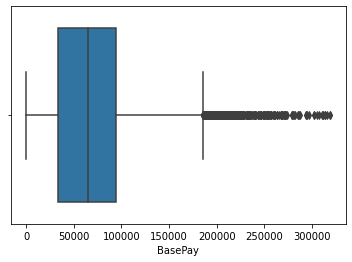

In [156]:
sns.boxplot(df['BasePay'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


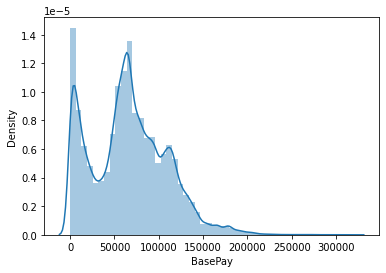

In [161]:
sns.distplot(df['BasePay'])
plt.show()

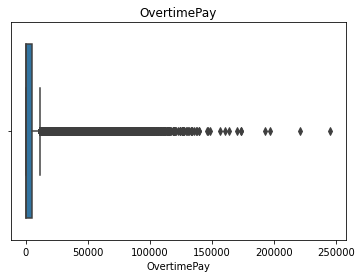

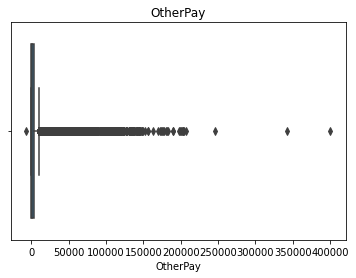

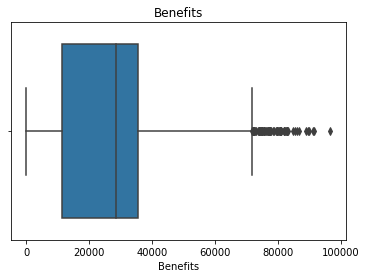

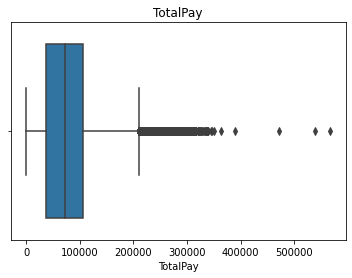

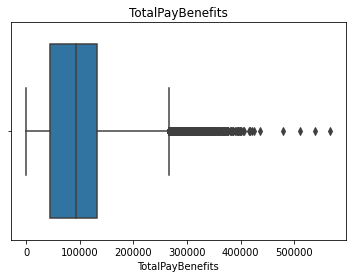

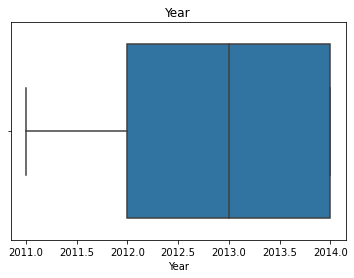

In [163]:
for col in df.select_dtypes(exclude='object').columns[1:]:
    sns.boxplot(x=col,data=df)
    plt.title(col)
    plt.show()

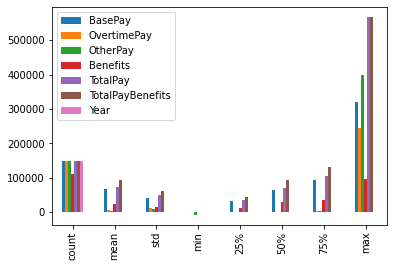

In [165]:
df.describe().plot(kind='bar')
plt.show()

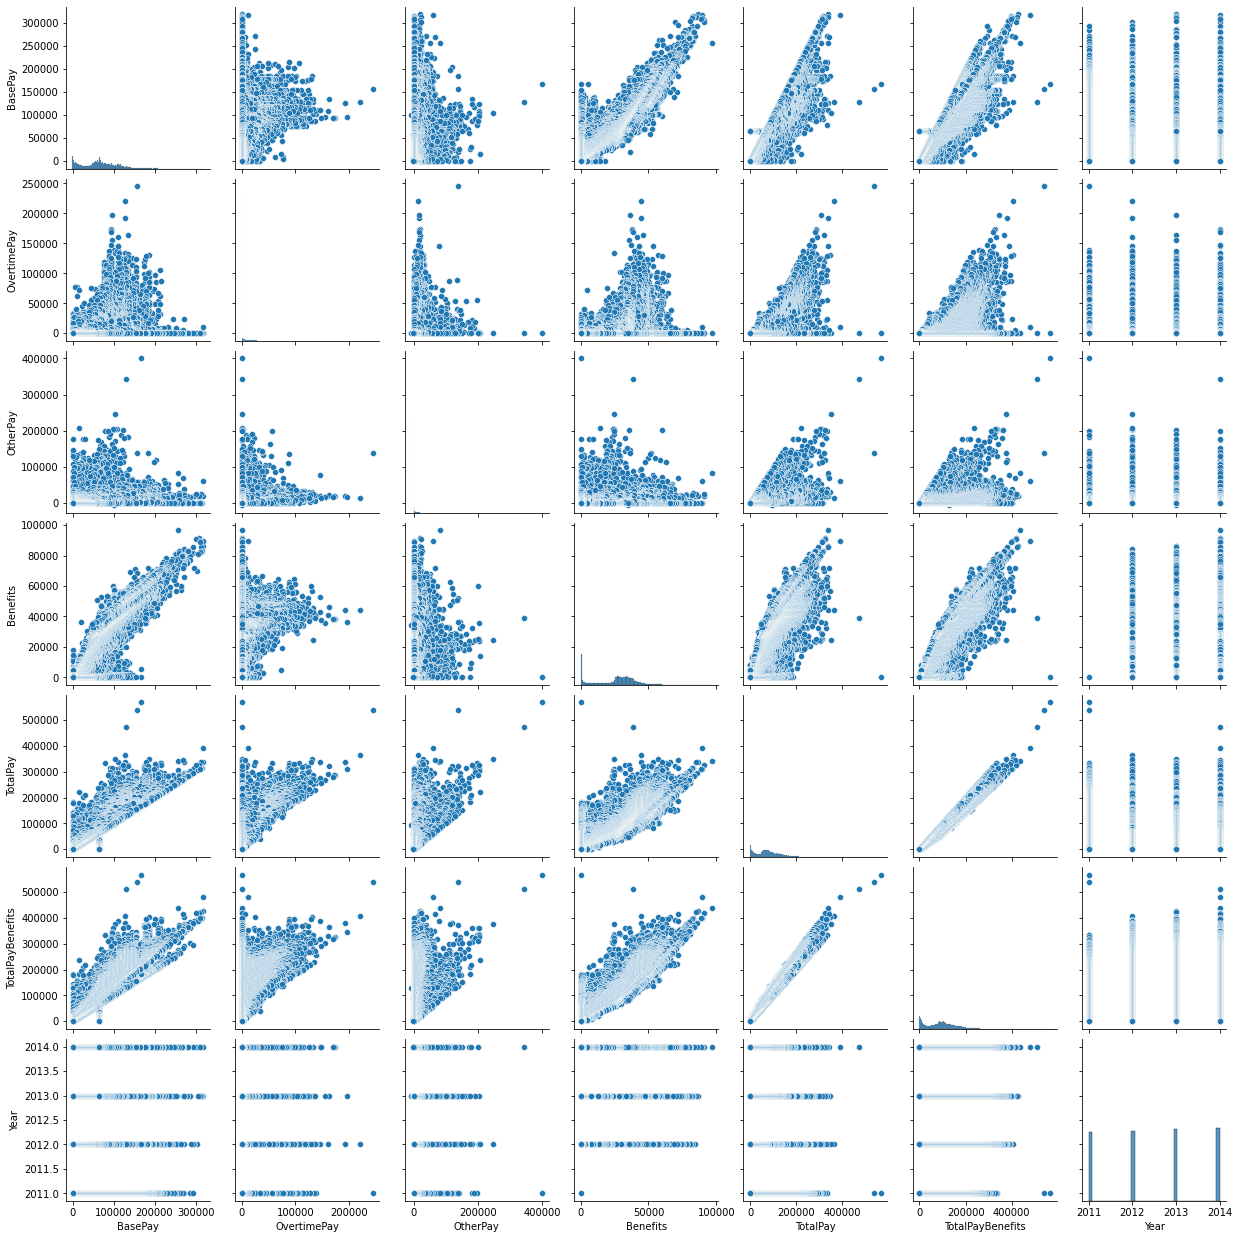

In [166]:
sns.pairplot(df.iloc[:,1:])
plt.show()

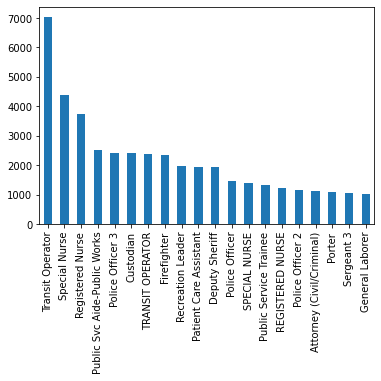

In [167]:
df.JobTitle.value_counts().nlargest(20).plot(kind='bar')
plt.show()

## Bivariate Analysis:

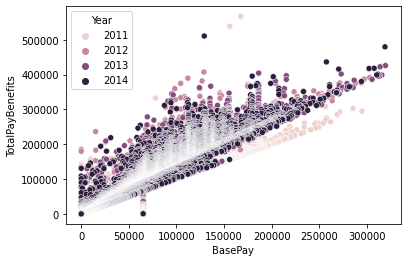

In [169]:
sns.scatterplot(x='BasePay',y='TotalPayBenefits',hue='Year',data=df)
plt.show()

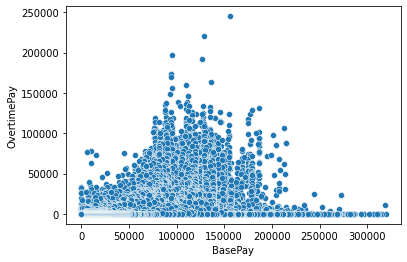

In [170]:
sns.scatterplot(x='BasePay',y='OvertimePay',data=df)
plt.show()

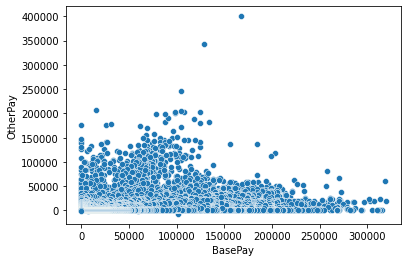

In [171]:
sns.scatterplot(x='BasePay',y='OtherPay',data=df)
plt.show()

In [172]:
grp = df.groupby('Year')

In [173]:
grp.aggregate(['max','mean','min'])

BasePay                        ... TotalPayBenefits                       
            max          mean     min  ...              max           mean     min
Year                                   ...                                        
2011  294580.02  63595.956517    0.00  ...        567595.43   71744.103871    0.00
2012  302578.00  65436.406857 -166.01  ...        407274.78  100553.229232    1.91
2013  319275.01  69555.662801   15.83  ...        425815.28  101440.519714  -33.89
2014  318835.49  66564.258561    0.00  ...        510732.68  100250.918884 -618.13

[4 rows x 18 columns]

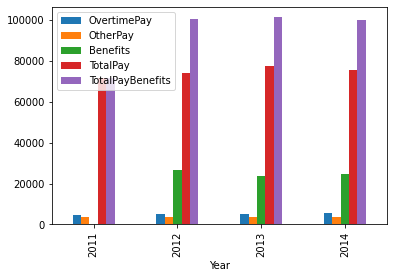

In [175]:
grp.mean().iloc[:,1:].plot(kind='bar')

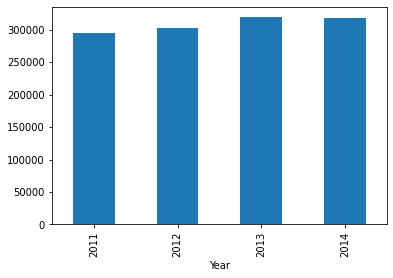

In [176]:
grp.max()['BasePay'].plot(kind='bar')
plt.show()

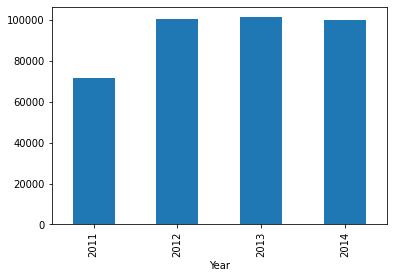

In [177]:
grp.mean()['TotalPayBenefits'].plot(kind='bar')
plt.show()

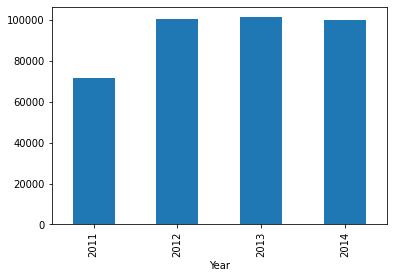

In [179]:
grp.mean()['TotalPayBenefits'].plot(kind='bar')
plt.show()